In [91]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

dtype_Dict = {'country': 'category',
              'age': 'int8',
              'new_user': 'int8',
              'source': 'category',
              'total_pages_visited': 'int8',
              'converted': 'int8'}

data = pd.read_csv('conversion_data.csv', sep=",", dtype = dtype_Dict)
sns.set(rc={'figure.figsize':(8,5)})

In [92]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [93]:
data.dtypes

country                category
age                        int8
new_user                   int8
source                 category
total_pages_visited        int8
converted                  int8
dtype: object

In [94]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [95]:
data.new_user.unique()

array([1, 0])

In [96]:
data.source.unique()

[Ads, Seo, Direct]
Categories (3, object): [Ads, Seo, Direct]

In [97]:
data.country.unique()

[UK, US, China, Germany]
Categories (4, object): [UK, US, China, Germany]

In [98]:
data.shape

(316200, 6)

In [99]:
data.groupby(['country']).count()

,age,new_user,source,total_pages_visited,converted
country,,,,,
China,76602,76602,76602,76602,76602
Germany,13056,13056,13056,13056,13056
UK,48450,48450,48450,48450,48450
US,178092,178092,178092,178092,178092


In [126]:
mask = data.age > 100
data = data[-mask]

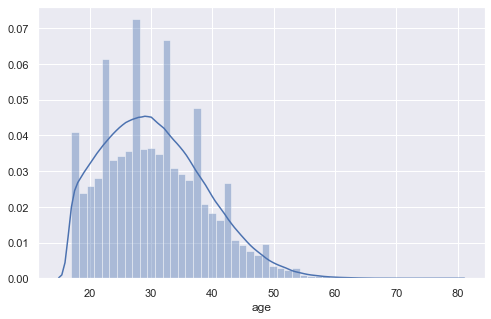

In [127]:
sns.distplot(data.age)

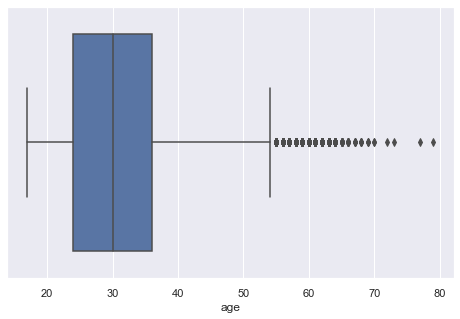

In [128]:
sns.boxplot(data.age)

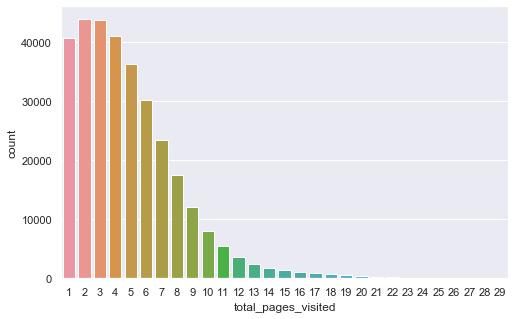

In [102]:
sns.countplot(data.total_pages_visited)

In [138]:
conversions = pd.read_csv('conversion_data.csv', sep=",", dtype = dtype_Dict)

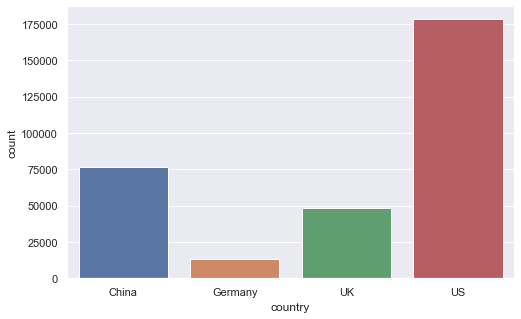

In [139]:
sns.countplot(conversions.country)

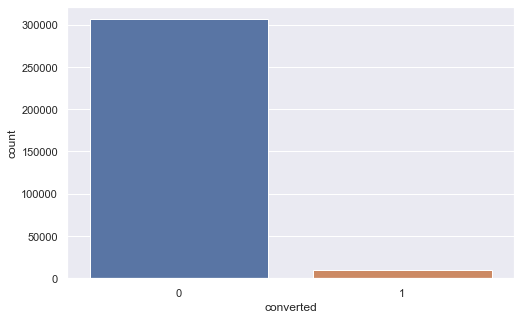

In [141]:
sns.countplot(conversions.converted)

# il y a beaucoup de non converted, donc si on fait un model sur ce jeu de donnée, le model est biased
# parce que il apprends sur un jeu de donnée qui contien beaucoup de non-converted

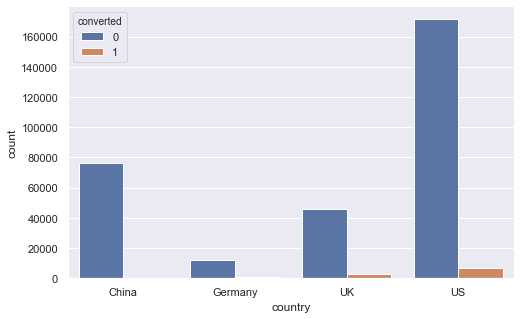

In [142]:
sns.countplot(conversions.country, hue = conversions.converted)

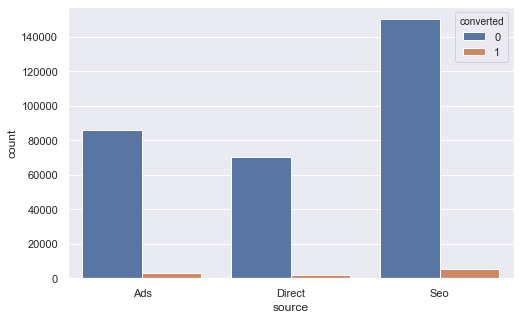

In [156]:
sns.countplot(conversions.source, hue = conversions.converted)

NameError: name 'ax' is not defined

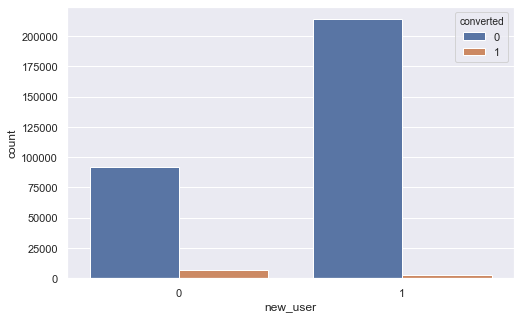

In [160]:
sns.countplot(conversions.new_user, hue = conversions.converted)
ax.set(xticks=range(len(["Old user", "New user"])), xticklabels=["Old user", "New user"])

In [150]:
total_visitors = conversions.groupby(['country']).count().converted

In [151]:
total_visitors

country
China       76602
Germany     13056
UK          48450
US         178092
Name: converted, dtype: int64

In [145]:
mask_converted = conversions.converted == 1

In [152]:
total_converted = conversions[mask_converted].groupby(['country']).count().converted

In [153]:
total_converted

country
China       102
Germany     816
UK         2550
US         6732
Name: converted, dtype: int64

In [155]:
total_converted/total_visitors*100

country
China      0.133156
Germany    6.250000
UK         5.263158
US         3.780069
Name: converted, dtype: float64

In [123]:
data.total_pages_visited.describe()

count    316200.000000
mean          4.872966
std           3.341104
min           1.000000
25%           2.000000
50%           4.000000
75%           7.000000
max          29.000000
Name: total_pages_visited, dtype: float64

In [104]:
#sns.lmplot(x = "age", y = "converted", data = data, logistic=True)

In [105]:
pd.get_dummies(data.country).head()

,China,Germany,UK,US
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,0,1


In [106]:
pd.get_dummies(data.source).head()

,Ads,Direct,Seo
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [107]:
data = pd.get_dummies(data)

In [108]:
pd.get_dummies(data).head()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1


In [109]:
X = data.drop(columns = ["converted"])

In [110]:
y = data["converted"]

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify = y, random_state = 42)

In [112]:
from sklearn.ensemble import RandomForestClassifier

rfc_50 = RandomForestClassifier(n_estimators=50)
rfc_50.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [113]:
from sklearn.metrics import classification_report

print("RANDOM FOREST")
print(classification_report(y_true = y_test, y_pred = rfc_50.predict(X_test)))

RANDOM FOREST
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     91800
           1       0.80      0.67      0.73      3060

    accuracy                           0.98     94860
   macro avg       0.90      0.83      0.86     94860
weighted avg       0.98      0.98      0.98     94860



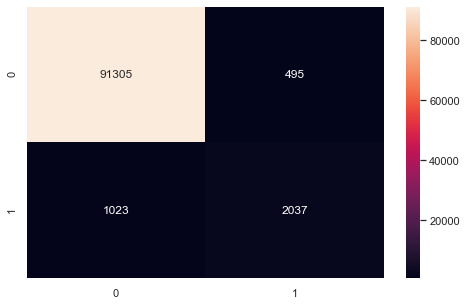

In [114]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rfc_50.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d")

In [119]:
from sklearn.model_selection import GridSearchCV

n_estimators = [1, 5, 10, 20, 50, 100]

hyperparameters = dict(n_estimators = n_estimators)

grid = GridSearchCV(rfc_50, param_grid=hyperparameters, cv = 10)

In [120]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [121]:
grid.best_params_

{'n_estimators': 50}

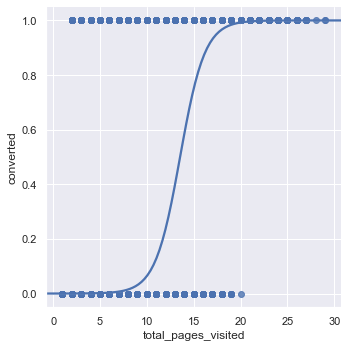

In [133]:
sns.lmplot(x = "total_pages_visited", y = "converted", data = data, logistic=True)

# si le nombre de pages est plus grand que 20, alors la probabilité que ils se sont converti est 1?

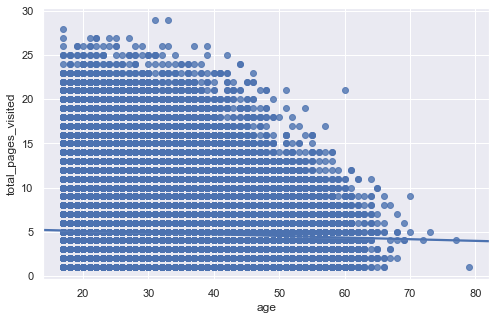

In [136]:
sns.regplot(x = "age", y = "total_pages_visited", data = data)

# pas d'info avec ça

In [ ]:
y.